<a href="https://colab.research.google.com/github/wollieliza/web-crawler-and-data-analysis-of-covid/blob/main/Web%20Crawler%20and%20Data%20Analysis%20of%20Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4
import numpy
import pandas
import requests

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live Update: 261,657,048 Cases and 5,216,375 Deaths from the Coronavirus - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-to
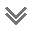

In [ ]:
# get data

html = requests.get('https://www.worldometers.info/coronavirus/')
html.content

In [ ]:
# parse html and find the table

html_parse = bs4.BeautifulSoup(html.content)
table = html_parse.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [ ]:
# get the rows

rows = table.find_all('tr')
print('First row:', rows[0])
print('\nFirst row:', rows[0].text.strip())
print('\nFirst row:', rows[0].text.strip().split('\n'))
print('\nFirst country:', rows[9].text.strip().split('\n'))

First row: <tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

First row: #
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Crit

In [ ]:
# convert list into DataFrame

data = []

for x in rows:
  data.append(x.text.strip().split('\n')[1:5])

df = pandas.DataFrame(data)
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"58,763,189","+9,415","1,189,813"
2,,"81,935,009","+60,500","1,211,146"
3,,"38,943,827","+2,359","1,180,989"
4,,"72,935,538","+224,413","1,406,917"


In [ ]:
df = pandas.DataFrame(data[9:],columns=data[0])
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"49,081,854","+4,159","799,344"
1,India,"34,572,523",,"468,554"
2,Brazil,"22,076,863",,"614,236"
3,UK,"10,146,915","+37,681","144,775"
4,Russia,"9,570,373","+33,548","272,755"


In [ ]:
df.to_csv('covid19.csv')

In [ ]:
df_plot = df[['Country,Other','TotalCases']]
df_plot = df_plot[:10]

df_plot.head()

,"Country,Other",TotalCases
0,USA,"49,081,854"
1,India,"34,572,523"
2,Brazil,"22,076,863"
3,UK,"10,146,915"
4,Russia,"9,570,373"


In [ ]:
#df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',','')).astype(int)

df_plot.head()

,"Country,Other",TotalCases
0,USA,"49,081,854"
1,India,"34,572,523"
2,Brazil,"22,076,863"
3,UK,"10,146,915"
4,Russia,"9,570,373"


In [ ]:
df_plot.matplotlib.pyplot.plot(kind='bar', x='Country,Other', y='TotalCases')

AttributeError: ignored